<a href="https://colab.research.google.com/github/schoi15-umbc/DATA-690-WANG/blob/main/world_development_explorer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Does GDP and Education Affect the Consumption of Renewable Energy? Comparing Different Countries?**
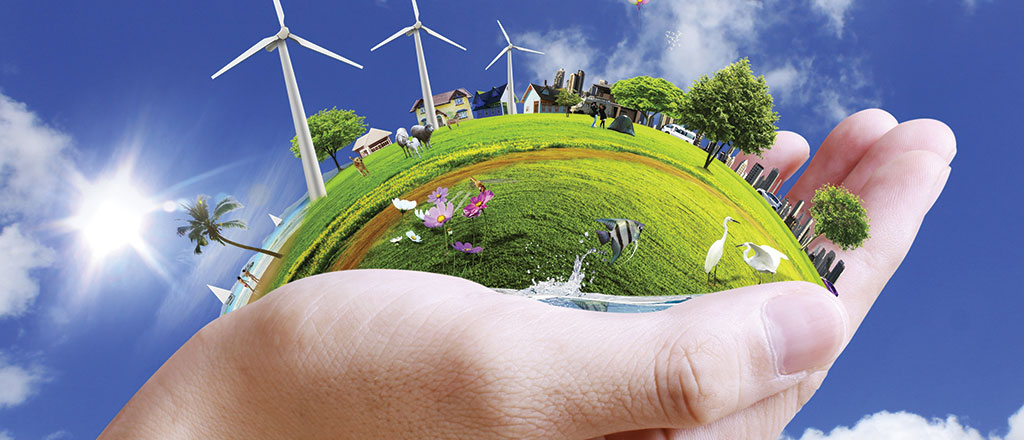

## **Introduction**
**Author: Sooyeon Choi**

Science and technology are advancing every day. Due to the inventions and improvements, our daily life has become much more convenient and time efficient. Everything from what we eat, wear, live, to our work life and entertainment, technology is embedded into the tools we use. This is great. However, in order to have every tool to work for us, the tools need energy. It consumes different types of energy to make our life convenient, and at the same time, it is destroying our environment. The earth’s pollution is getting out of hand and significantly contributing to climate change. One big thing we can do to make effort of reducing pollution is to use less of nonrenewable energy resources such as coal, nuclear oil, and natural gas, and start using more of renewable energy such as solar, wing, water, biomass, and geothermal. In this article, we will be comparing several countries’ consumption of renewable energy by the country’s land size with GDP per capita and Education. The countries were selected in diverse area and size.


## **Project Information**

###**Data**
The ***dataset*** was retrieved from http://www.worlddev.xyz . Out of many ***indicators***, four were chosen for the study. 
* (**Education**) Barro-Lee Average years of total schooling, age 15+ total : Average years of primary schooling, 15+, total is the
average years of primary education completed among people over age 15.

* (**Climate Change**) Renewable Energy Consumption (% of total final energy consumption) : Average years of primary schooling, 15+, 
total is the average years of primary education completed among people over age 15.

* (**Environment**) Land Area (sq.km) : Land area is a country's total area, excluding area under inland water bodies, national claims to 
continental shelf, and exclusive economic zones. In most cases the definition of inland water bodies includes major rivers and lakes.

* (**Economy & Growth**) GDP per capita (current US$) : GDP per capita is gross domestic product divided by midyear population. 
GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not 
included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for
depletion and degradation of natural resources. Data are in current U.S. dollars.

The ***timeline*** for the study was chosen from 2010 - 2015. 

The ***countries selected*** were : United States, Brazil, China, United Kingdom, New Zealand, India, Costa Rica, Mexico, Kenya. 


### **Main Questions**
With the given dataset and indicators, our goal is to answer the two questions below.

**1. How does Renewable Energy Consumption and GDP per capita relate in different countires over the time period 2010 - 2015? Buble size shows land size?**

 **2. How does Renewable Energy Consumption and Education relate in different countires? Buble size shows land size**

 



1. Import Package 

In [4]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

2. Data Prep

There are two datasets. **df_ed** will contain the indicators education, climate change, and environment. **df_gdp** will contain the indicators economy & growth, climate change, and environment.  

In [5]:
df_ed = pd.read_csv("https://github.com/schoi15-umbc/DATA-690-WANG/raw/main/world_development_explorer/data/wdi_data_ed.csv") 
df_gdp = pd.read_csv("https://github.com/schoi15-umbc/DATA-690-WANG/raw/main/world_development_explorer/data/wdi_data_gdp.csv") 

df_ed.drop(columns=['Unnamed: 0'], inplace= True)
df_gdp.drop(columns=['Unnamed: 0'], inplace= True)

In [6]:
df_ed.head(5)

,Year,BAR.SCHL.15UP,EG.FEC.RNEW.ZS,AG.LND.TOTL.K2,Country Code,Country Name,Region,Income Group,Lending Type
0,2010,7.89,47.006662,8358140.0,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
1,2010,7.51,12.884310,9424700.7,CHN,China,East Asia & Pacific,Upper middle income,IBRD
2,2010,7.97,42.311253,51060.0,CRI,Costa Rica,Latin America & Caribbean,Upper middle income,IBRD
3,2010,6.24,39.481509,2973190.0,IND,India,South Asia,Lower middle income,IBRD
4,2010,6.14,76.273123,569140.0,KEN,Kenya,Sub-Saharan Africa,Lower middle income,Blend


In [7]:
df_ed.describe()

,Year,BAR.SCHL.15UP,EG.FEC.RNEW.ZS,AG.LND.TOTL.K2
count,9.0,9.000000,9.000000,9.000000e+00
mean,2010.0,8.993333,29.975957,3.663649e+06
std,0.0,2.555494,23.962262,4.102302e+06
min,2010.0,6.140000,3.638918,5.106000e+04
25%,2010.0,7.510000,9.359978,2.633100e+05
50%,2010.0,7.970000,31.322692,1.943950e+06
75%,2010.0,10.980000,42.311253,8.358140e+06
max,2010.0,13.180000,76.273123,9.424701e+06


In [8]:
df_gdp.head(5)

,Year,EG.FEC.RNEW.ZS,AG.LND.TOTL.K2,NY.GDP.PCAP.CD,Country Code,Country Name,Region,Income Group,Lending Type
0,2010,47.006662,8358140.0,11286.243016,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
1,2011,45.468551,8358140.0,13245.612500,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
2,2012,43.620795,8358140.0,12370.024201,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
3,2013,42.447843,8358140.0,12300.324882,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD
4,2014,41.841879,8358140.0,12112.588206,BRA,Brazil,Latin America & Caribbean,Upper middle income,IBRD


In [9]:
df_gdp.describe()

,Year,EG.FEC.RNEW.ZS,AG.LND.TOTL.K2,NY.GDP.PCAP.CD
count,54.000000,54.000000,5.400000e+01,54.000000
mean,2012.500000,29.327343,3.663649e+06,19606.383135
std,1.723861,22.040292,3.904005e+06,18925.723732
min,2010.000000,3.638918,5.106000e+04,951.687961
25%,2011.000000,9.103658,2.633100e+05,5792.828780
50%,2012.500000,30.632009,1.943950e+06,10518.616595
75%,2014.000000,40.246970,8.358140e+06,39846.025701
max,2015.000000,78.497620,9.424701e+06,56839.381774


### **1. How does Renewable Energy Consumption and GDP per capita relate in different countires over the time period 2010 - 2015? Buble size shows land size?**

#### To answer our first question, first we will look at two piecharts that shows the basic information of 1. GDP per capita in the year 2015 for each country and 2. Land area from each country in 2015. 




In [10]:
fig = px.pie(df_gdp, values='NY.GDP.PCAP.CD', 
             names='Country Name',
             title="2015 GDP per Captia" )
fig.show()

In [11]:
fig = px.pie(df_gdp, values='AG.LND.TOTL.K2', 
             names='Country Name',
             title="2015 Land Area")
fig.show()

Next, we will look at a line graph that shows GDP per capita by year in different countries, where the Y axis (NY.GDP.PCAP.CD) is the GDP per capita. 

In [12]:
fig = px.line(df_gdp, x="Year", 
              y="NY.GDP.PCAP.CD", 
              color='Country Name',
              title="GDP per capita by year in different countries")
fig.show()

The chart above shows GDP per capita by year in different countries, where the Y axis (NY.GDP.PCAP.CD) is the GDP per capita. We can see that United States has the highest GDP per capita and increases over the 5years, and Kenya has the lowest. Most countries do not have a drastic change. UK and New Zeland had a increase from 2010 to 2014 but declined in 2015.

In [13]:
fig = px.line(df_gdp, x="Year", 
              y="EG.FEC.RNEW.ZS", 
              color='Country Name',
              title="Renewable Energy Consumption rate by year in different countries")
fig.show()

The chart shows the renewable energy consumption over the years for each countries. Kenya has the highest rate while UK has the lowest. 

In [14]:
fig = px.scatter(df_gdp, x="NY.GDP.PCAP.CD", y="EG.FEC.RNEW.ZS",
	         size="AG.LND.TOTL.K2", color="Country Name", hover_name="Country Name", log_x=True, size_max=60
                  ,animation_frame="Year", title="Renewable Energy Consumption rate by GDP per capita (Bubble size = land area)")
fig.show()

The chart above shows X (NY.GDP.PCAP.CD) = GDP per capita and Y (EG.FEC.RNEW.ZS) = Renewable energy consumption, along with the years from 2010 - 2015. 


### **Findings**
* The chart shows that the land size does not always correlate to the GDP per capita of the county. We can see that even though some countries are much smaller in size, they have a higher GDP than the countries that are larger in the land area.

* The land area size does not always reflect how much renewable energy the county consumes. The chart shows that some large countries have the lowest renewable energy consumption rate, but also some small countries have lower rate than the Latin America and Caribbean Region.

* Although Kenya has the lowest GDP per capita, Kenya significantly has the highest renewable renergy consumption rate. Increases from 2010-2012 but decreases from 2012-2015.

* In 2010 UK has the lowest renewable energy consumption rate but by 2015 USA becomes the lowest even though they have the highest GDP per capita.

### **2. How does Renewable Energy Consumption and Education relate in different countires? Buble size shows land size**
#### To answer our second question, we will look at two charts. The first one is a pie chart that shows the average years of total schooling for people who are at age 15+ per country. US has the highest rate followed by UK and New Zealand. Kenya has the lowest education rate.


In [18]:
fig = px.pie(df_ed, values='BAR.SCHL.15UP', 
             names='Country Name',
             title="Average Years of total schooling age15+ per Country " )
fig.show()

The chart below shows renewable energy consumption by education for each country.

In [17]:
fig = px.scatter(df_ed, x="BAR.SCHL.15UP", 
                 y="EG.FEC.RNEW.ZS", 
                 color="Country Name",
                 size='EG.FEC.RNEW.ZS', 
                 hover_data=['BAR.SCHL.15UP'],title="Renewable Energy Consumption by education (avg years of total schooling)")
fig.show()

### **Findings**

* Although Kenya has the highest renewable energy consumption rate, they have the lowest average years of total schooling.

* USA has the highest rate of education.

* The scatter plot some-what shows that the more education, less of renewable energy consumption and less education, more renewable energy consumption.

### **Conclusion**

It is hard to determine everything just by the indicators and countries compared in the article. We cannot say for 100% that one indicator is a definite factor for renewable energy consumption rate. However, we were able to find out that

* The land area (size) does not have high correlating factor to renewable energy consumption rate.

* Although not definite, the charts show that the countries with higher GDP tend to have lower renewable energy consumption rate.

* The chart shows that countries with higher education rate tends to have lower renewable energy consumption rate.

* Most of the countries had a lower renewable energy consumption rate by 2015 when compared to 2010.

For further studies, it would help to compare more countries with the same indicators to see if the factors have a high correlation to each other. Also, it would be interesting to find what other factors influence the renewable energy consumption rate.